In [1]:
# from datetime import datetime
# from pathlib import Path
# from time import time
# from typing import Literal

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from sklearn.datasets import fetch_20newsgroups, make_blobs
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from torchvision.datasets import EMNIST, MNIST
from scipy.spatial.distance import pdist
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
import faiss
from sklearn.decomposition import PCA

In [5]:
data = MNIST("mnist", train=True, download=True)
dataset = "mnist"
X = data.data
N = X.shape[0]
X = X.reshape(N, -1) / 255.0
Y = data.targets[:N]

In [ ]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
dist_X = pdist(X_pca, metric="euclidean")

In [26]:

data = EMNIST("emnist", split="balanced", train=True, download=True)
dataset = "emnist"
X = data.data
N = X.shape[0]
X = X.reshape(N, -1) / 255.0
Y = data.targets[:N]

In [23]:
newsgroups = fetch_20newsgroups(
    data_home="20ng", subset="all", remove=("headers", "footers", "quotes")
)
dataset = "20ng"
posts = newsgroups.data
Y = torch.Tensor(newsgroups.target)
vectorizer = TfidfVectorizer(max_features=1000)
tmp = vectorizer.fit_transform(posts).toarray()
# scaler = MinMaxScaler()
# tmp = scaler.fit_transform(tmp)
pca = PCA(n_components=50)
X = torch.Tensor(pca.fit_transform(tmp))

In [7]:
X = np.loadtxt("HIGGS.csv", delimiter=",")
dataset = "higgs"
Y = torch.Tensor(X[:5_000_000, 0])
X = torch.Tensor(X[:5_000_000, 1:])

In [7]:
X, Y = make_blobs(n_samples=1_000_000, centers=10, n_features=20)
dataset = "blobs"
X = torch.Tensor(X)
Y = torch.Tensor(Y)

In [5]:
from cuml import UMAP
model = "umap"
model_dr = UMAP(verbose=6)
X = X.numpy()

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
from ivhd import IVHD
model = "ivhd"
model_dr = IVHD(
        2,
        nn=5,
        rn=2,
        c=0.05,
        eta=0.02,
        optimizer=None,
        optimizer_kwargs={"lr": 0.1},
        epochs=3_000,
        device='cuda',
        velocity_limit=False,
        autoadapt=False,
        graph_file="./graph_files/graph.bin"
    )

In [40]:
from cuml import TSNE
model = "tsne"
model_dr = TSNE(verbose=True, method='fft', n_neighbors=15, perplexity=50)
# X = X.numpy()

/net/people/plgrid/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


In [30]:
from parampacmap import ParamPaCMAP
model_dr = ParamPaCMAP(verbose=True)

In [18]:
%%timeit -n4 -r1
model_dr.fit_transform(X)
print("krowa")

Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.006059


0 loss: 0.3474653363227844
100 loss: 0.044893939048051834
200 loss: 0.04464685171842575
300 loss: 0.04458111897110939
400 loss: 0.04455118998885155
500 loss: 0.04453686997294426
600 loss: 0.04452525079250336
700 loss: 0.04451721906661987
800 loss: 0.044511206448078156
900 loss: 0.04450510814785957
1000 loss: 0.044501665979623795
1100 loss: 0.04449796304106712
1200 loss: 0.04449426755309105
1300 loss: 0.044491514563560486
1400 loss: 0.04448901116847992
1500 loss: 0.04448680952191353
1600 loss: 0.04448588192462921
1700 loss: 0.04448475316166878
1800 loss: 0.04448399692773819
1900 loss: 0.04448296129703522
2000 loss: 0.04448160156607628
2100 loss: 0.044480372220277786
2200 loss: 0.04447973147034645
2300 loss: 0.044479403644800186
2400 loss: 0.04447907209396362
2500 loss: 0.044478729367256165
2600 loss: 0.0444784015417099
2700 loss: 0.04447793588042259
2800 loss: 0.044477447867393494
2900 loss: 0.04447722062468529
krowa
Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.005097


0 loss: 0.04627363011240959
100 loss: 0.044606104493141174
200 loss: 0.04453098028898239
300 loss: 0.04450562968850136
400 loss: 0.04449035972356796
500 loss: 0.04448087885975838
600 loss: 0.04447408765554428
700 loss: 0.04446932673454285
800 loss: 0.04446639120578766
900 loss: 0.04446401819586754
1000 loss: 0.04446064680814743
1100 loss: 0.04445860534906387
1200 loss: 0.04445590078830719
1300 loss: 0.04445401951670647
1400 loss: 0.044452451169490814
1500 loss: 0.044451043009757996
1600 loss: 0.044449999928474426
1700 loss: 0.044448964297771454
1800 loss: 0.04444810003042221
1900 loss: 0.0444471649825573
2000 loss: 0.04444669932126999
2100 loss: 0.04444624111056328
2200 loss: 0.04444580152630806
2300 loss: 0.044445086270570755
2400 loss: 0.044444307684898376
2500 loss: 0.04444397985935211
2600 loss: 0.04444362223148346
2700 loss: 0.044442690908908844
2800 loss: 0.04444219917058945
2900 loss: 0.04444176331162453
krowa
Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.005115


0 loss: 0.0462443046271801
100 loss: 0.04457328841090202
200 loss: 0.04451462998986244
300 loss: 0.04449203237891197
400 loss: 0.0444793626666069
500 loss: 0.04447236657142639
600 loss: 0.044467899948358536
700 loss: 0.04446527734398842
800 loss: 0.044462233781814575
900 loss: 0.044460728764534
1000 loss: 0.04445957392454147
1100 loss: 0.04445821791887283
1200 loss: 0.044457051903009415
1300 loss: 0.044455818831920624
1400 loss: 0.04445473477244377
1500 loss: 0.04445379599928856
1600 loss: 0.044453077018260956
1700 loss: 0.044452425092458725
1800 loss: 0.044451989233493805
1900 loss: 0.04445146769285202
2000 loss: 0.04445071890950203
2100 loss: 0.04445015639066696
2200 loss: 0.044449582695961
2300 loss: 0.04444930702447891
2400 loss: 0.044449035078287125
2500 loss: 0.044448841363191605
2600 loss: 0.04444880038499832
2700 loss: 0.044448669999837875
2800 loss: 0.04444863647222519
2900 loss: 0.044448595494031906
krowa
Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.005169


0 loss: 0.04622526839375496
100 loss: 0.044605933129787445
200 loss: 0.04454141482710838
300 loss: 0.04451684281229973
400 loss: 0.04450374096632004
500 loss: 0.044493887573480606
600 loss: 0.04448657110333443
700 loss: 0.044481802731752396
800 loss: 0.04447849467396736
900 loss: 0.04447459429502487
1000 loss: 0.04447225481271744
1100 loss: 0.04447050020098686
1200 loss: 0.0444696769118309
1300 loss: 0.04446905851364136
1400 loss: 0.044468142092227936
1500 loss: 0.04446737840771675
1600 loss: 0.044466283172369
1700 loss: 0.04446542263031006
1800 loss: 0.04446380212903023
1900 loss: 0.04446276277303696
2000 loss: 0.04446152597665787
2100 loss: 0.044460367411375046
2200 loss: 0.04446003586053848
2300 loss: 0.04445960000157356
2400 loss: 0.04445938393473625
2500 loss: 0.04445865750312805
2600 loss: 0.04445851594209671
2700 loss: 0.04445831850171089
2800 loss: 0.044458214193582535
2900 loss: 0.04445820301771164
krowa
1.91 s ± 0 ns per loop (mean ± std. dev. of 1 run, 4 loops each)


Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:01.086614


0 loss: 0.34810319542884827
100 loss: 0.02536562643945217
200 loss: 0.011149708181619644
300 loss: 0.009953620843589306
400 loss: 0.009780367836356163
500 loss: 0.00972622912377119
600 loss: 0.009701535105705261
700 loss: 0.009688444435596466
800 loss: 0.009680736809968948
900 loss: 0.009675715118646622
1000 loss: 0.009672142565250397
1100 loss: 0.009669406339526176
1200 loss: 0.009667201898992062
1300 loss: 0.009665368124842644
1400 loss: 0.009663819335401058
1500 loss: 0.009662507101893425
1600 loss: 0.009661385789513588
1700 loss: 0.009660436771810055
1800 loss: 0.009659633971750736
1900 loss: 0.00965895690023899
2000 loss: 0.0096583915874362
2100 loss: 0.009657921269536018
2200 loss: 0.009657531045377254
2300 loss: 0.009657199494540691
2400 loss: 0.009656921960413456
2500 loss: 0.009656679816544056
2600 loss: 0.009656473062932491
2700 loss: 0.009656284935772419
2800 loss: 0.009656119160354137
2900 loss: 0.009655964560806751


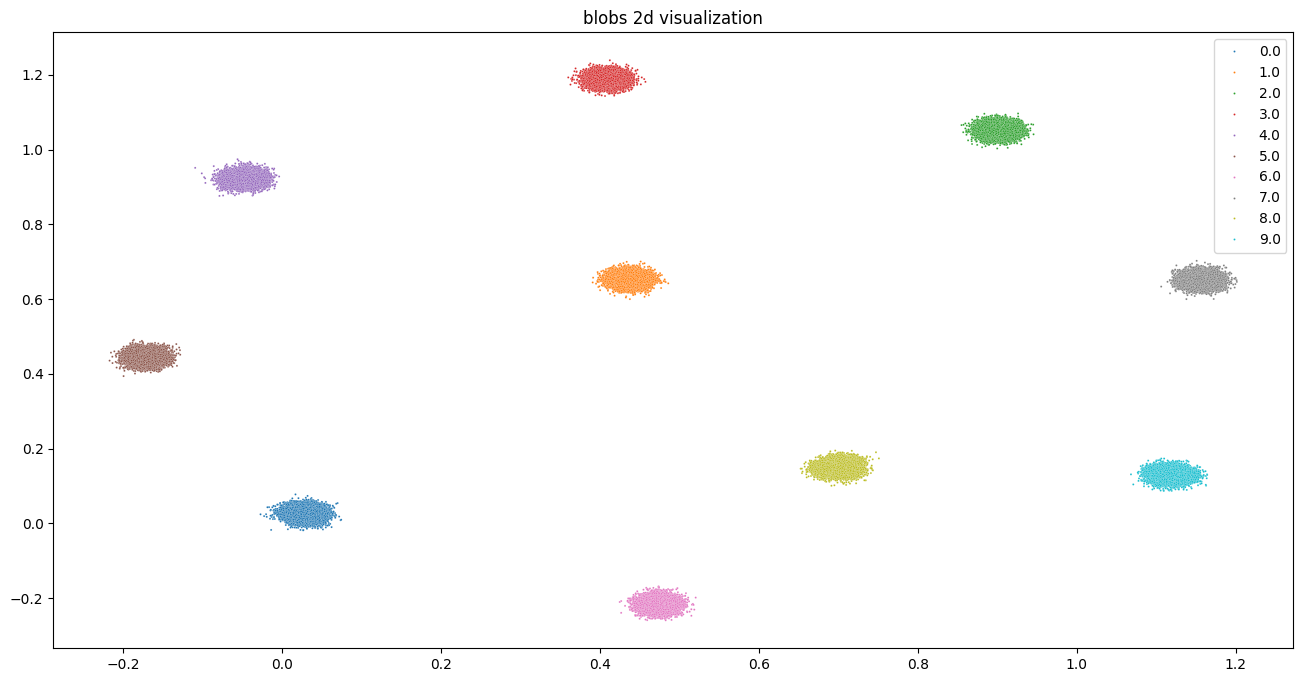

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16, 8))
plt.title(f"{dataset} 2d visualization")

x = model_dr.fit_transform(X)

sns.scatterplot(
    x=x[:, 0],
    y=x[:, 1],
    hue=Y,
    s=2,
    palette=sns.color_palette("tab10", torch.unique(Y).size(0)),
)
plt.legend()
plt.savefig("./krowooowa.png")

In [2]:
def trustworthiness(X, X_embedded, dist_X,*, n_neighbors=5, metric="euclidean"):
    n_samples = X.shape[0]
    if n_neighbors >= n_samples / 2:
        raise ValueError(
            f"n_neighbors ({n_neighbors}) should be less than n_samples / 2"
            f" ({n_samples / 2})"
        )
    
    if dist_X is None:
        dist_X = pdist(X, metric=metric)
    np.fill_diagonal(dist_X, np.inf)
    ind_X = np.argsort(dist_X, axis=1)
    ind_X_embedded = (
        NearestNeighbors(n_neighbors=n_neighbors)
        .fit(X_embedded)
        .kneighbors(return_distance=False)
    )

    inverted_index = np.zeros((n_samples, n_samples), dtype=int)
    ordered_indices = np.arange(n_samples + 1)
    inverted_index[ordered_indices[:-1, np.newaxis], ind_X] = ordered_indices[1:]
    ranks = (
        inverted_index[ordered_indices[:-1, np.newaxis], ind_X_embedded] - n_neighbors
    )
    t = np.sum(ranks[ranks > 0])
    t = 1.0 - t * (
        2.0 / (n_samples * n_neighbors * (2.0 * n_samples - 3.0 * n_neighbors - 1.0))
    )
    return t

In [3]:
from cuml import TSNE, UMAP
from ivhd import IVHD
# These libraries do not use gpu, but for convergence it is not important
from pacmap import PaCMAP
from trimap import TRIMAP
from sklearn.metrics import silhouette_score

def plot_convergence(X, Y, steps_start, steps_stop, step_size):
    # Do it only on 10_000 samples since trustworthiness calculates pairwaise distance
    # and it takes to much time to do on the whole dataset
    sample_size = 10000
    indices = torch.randperm(X.shape[0])[:sample_size]

    # Subset the data and labels
    X_sample = X[indices]
    Y_sample = Y[indices]

    dist = pairwise_distances(X_sample)
    steps = range(steps_start, steps_stop, step_size)
    models = {
        "TSNE": lambda step: TSNE(n_iter=step, exaggeration_iter=min(250, step)),
        "UMAP": lambda step: UMAP(n_epochs=step),
        "IVHD": lambda step: IVHD(
            2,
            nn=2,
            rn=1,
            c=0.05,
            eta=0.02,
            optimizer=None,
            optimizer_kwargs={"lr": 0.1},
            epochs=step,
            device="cuda",
            velocity_limit=False,
            autoadapt=False,
            graph_file="./graph_files/graph.bin",
        ),
        "TRIMAP": lambda step: TRIMAP(n_iters=step),
        "PaCMAP": lambda step: PaCMAP(num_iters=step),
    }
    results_list = []
    for step in steps:
        for model_name, model_func in models.items():
            try:
                model_dr = model_func(step)
                try:
                    X_embedded = model_dr.fit_transform(X_sample)
                except Exception: # bad practice I know
                    X_embedded = model_dr.fit_transform(X_sample.numpy())

                trust = trustworthiness(X_sample, X_embedded, dist)
                sil_score = silhouette_score(X_embedded, Y_sample.numpy())

                results_list.append(
                    {
                        "Step": step,
                        "Model": model_name,
                        "Trustworthiness": trust,
                        "Silhouette": sil_score,
                    }
                )
            except Exception as e:
                print(f"Error with {model_name} at step {step}: {e}")

    results = pd.DataFrame(results_list)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=results, x="Step", y="Trustworthiness", hue="Model", marker="o")
    plt.title("Trustworthiness vs Steps")
    plt.savefig('convergence_th.png')

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=results, x="Step", y="Silhouette", hue="Model", marker="o")
    plt.title("Silhouette Score vs Steps")
    plt.savefig('convergence_sh.png')

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from time import time
from ivhd import IVHD
from sklearn.datasets import make_blobs

def speed_test_net(device, dataset):
    result_list = []
    match dataset:
        case "mnist":
            data = MNIST("mnist", train=True, download=True)
            X = data.data
            N = X.shape[0]
            X = X.reshape(N, -1) / 255.0
        case "emnist":
            data = EMNIST("emnist", split="balanced", train=True, download=True)
            X = data.data
            N = X.shape[0]
            X = X.reshape(N, -1) / 255.0
        case "synthetic":
            X, Y = make_blobs(n_samples=1_000_000, centers=10, n_features=20)
            X = torch.Tensor(X)
            Y = torch.Tensor(Y)
            
        case _:
            raise ValueError("No such dataset!")
    if device == 'cuda':
        from cuml import TSNE, UMAP
        models = {
            'TSNE': TSNE(),
            'UMAP': UMAP(),
            'IVHD': IVHD(
                2,
                nn=2,
                rn=1,
                c=0.05,
                eta=0.02,
                optimizer=None,
                optimizer_kwargs={"lr": 0.1},
                epochs=3_000,
                device="cuda",
                velocity_limit=False,
                autoadapt=False,
                graph_file="./graph_files/graph.bin",
            ),
        }
    else:
        from models.tsne import MY_TSNE
        from umap import UMAP
        from trimap import TRIMAP
        from pacmap import PaCMAP
        models = {
            'TSNE': MY_TSNE(),
            'UMAP': UMAP(),
            'IVHD': IVHD(
                2,
                nn=2,
                rn=1,
                c=0.05,
                eta=0.02,
                optimizer=None,
                optimizer_kwargs={"lr": 0.1},
                epochs=3_000,
                device="cpu",
                velocity_limit=False,
                autoadapt=False,
                graph_file="./graph_files/graph.bin",
            ),
            'TRIMAP': TRIMAP(),
            'PACMAP': PaCMAP()
        }
    for model_name, model_dr in models.items():
        try:
            start = time()
            _ = model_dr.fit_transform(X)
            stop = time()
        except Exception as e:
            start = time()
            _ = model_dr.fit_transform(X.numpy())
            stop = time()
        result_list.append({
            "Model": model_name,
            "Time": stop - start
        })
    results = pd.DataFrame(result_list)

    plt.figure(figsize=(8, 6))
    sns.barplot(data=results, x="Model", y="Time", palette="pastel")

    # Customize the plot
    plt.title("Time by Model", fontsize=16)
    plt.xlabel("Model", fontsize=14)
    plt.ylabel("Time", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("dataset_time.png")
        

In [17]:
from time import time
from ivhd import IVHD

def plot_for_embed_dim(device):
    data = MNIST("mnist", train=True, download=True)
    # dataset = "mnist"
    X = data.data
    N = X.shape[0]
    X = X.reshape(N, -1) / 255.0
    # Y = data.targets[:N]

    embed_dim = [2, 4, 6, 8]
    if device == 'cuda':
        from cuml import TSNE, UMAP
        models = {
            "TSNE": lambda n_dim: TSNE(n_components=n_dim),
            "UMAP": lambda n_dim: UMAP(n_components=n_dim),
            "IVHD": lambda n_dim: IVHD(
                n_dim,
                nn=2,
                rn=1,
                c=0.05,
                eta=0.02,
                optimizer=None,
                optimizer_kwargs={"lr": 0.1},
                epochs=3_000,
                device="cuda",
                velocity_limit=False,
                autoadapt=False,
                graph_file="./graph_files/graph.bin",
            ),
        }
    else:
        from models.tsne import MY_TSNE
        from umap import UMAP
        from trimap import TRIMAP
        from pacmap import PaCMAP
        models = {
            "TSNE": lambda n_dim: MY_TSNE(n_components=n_dim),
            "UMAP": lambda n_dim: UMAP(n_components=n_dim),
            "IVHD": lambda n_dim: IVHD(
                n_dim,
                nn=2,
                rn=1,
                c=0.05,
                eta=0.02,
                optimizer=None,
                optimizer_kwargs={"lr": 0.1},
                epochs=3_000,
                device="cpu",
                velocity_limit=False,
                autoadapt=False,
                graph_file="./graph_files/graph.bin",
            ),
            "Trimap": lambda n_dim: TRIMAP(n_dims=n_dim),
            "Pacmap": lambda n_dim: PaCMAP(n_components=n_dim)
        }


    results_list = []
    for n_dim in embed_dim:
        for model_name, model_func in models.items():
            print(f"Runnig model {model_name}")
            try:
                model_dr = model_func(n_dim)
                try:
                    start = time()
                    X_embedded = model_dr.fit_transform(X)
                    stop = time()
                except Exception: # bad practice I know
                    start = time()
                    X_embedded = model_dr.fit_transform(X.numpy())
                    stop = time()
                results_list.append(
                    {
                        "Time": stop - start,
                        "Model": model_name,
                        "Dim": n_dim
                    }
                )
            except Exception as e:
                print(f"Error with {model_name} message: {e}")

    results = pd.DataFrame(results_list)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=results, x="Dim", y="Time", hue="Model", marker="o")
    plt.title("Time of embedding to a given dimention")
    plt.savefig('time_of_dim.png')

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: n_iter = 100 might cause TSNE to output wrong results. Set it higher.
  return init_func(self, *args, **filtered_kwargs)
/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.018548


0 loss: 0.3483544886112213


/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.018994


0 loss: 0.3473299443721771
100 loss: 0.030532579869031906


/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.019079


0 loss: 0.35008370876312256
100 loss: 0.030640654265880585
200 loss: 0.025025200098752975


/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.018014


0 loss: 0.34675145149230957
100 loss: 0.030156558379530907
200 loss: 0.024107299745082855
300 loss: 0.020139899104833603


/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.019170


0 loss: 0.35209542512893677
100 loss: 0.03052094392478466
200 loss: 0.02463950216770172
300 loss: 0.020758751779794693
400 loss: 0.0178684014827013


/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.
0 loss: 0.35039448738098145


0:00:00.017931


100 loss: 0.030513526871800423
200 loss: 0.025199973955750465
300 loss: 0.021569807082414627
400 loss: 0.018998190760612488
500 loss: 0.01716887205839157


/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.018942


0 loss: 0.34653398394584656
100 loss: 0.030355161055922508
200 loss: 0.024818051606416702
300 loss: 0.021292416378855705
400 loss: 0.01870131865143776
500 loss: 0.01674080081284046
600 loss: 0.015320000238716602


/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.018148


0 loss: 0.3532395362854004
100 loss: 0.030226562172174454
200 loss: 0.024490123614668846
300 loss: 0.02083515003323555
400 loss: 0.018398668617010117
500 loss: 0.01671452634036541
600 loss: 0.015522316098213196
700 loss: 0.014699755236506462


/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.018000


0 loss: 0.3453635573387146
100 loss: 0.030528714880347252
200 loss: 0.025168564170598984
300 loss: 0.02181176096200943
400 loss: 0.01927988976240158
500 loss: 0.01722208596765995
600 loss: 0.015591057017445564
700 loss: 0.014381350949406624
800 loss: 0.013548139482736588


/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.018572


0 loss: 0.3461766242980957
100 loss: 0.03075586073100567
200 loss: 0.025384720414876938
300 loss: 0.02168203517794609
400 loss: 0.018791351467370987
500 loss: 0.016719447448849678
600 loss: 0.015293275006115437
700 loss: 0.01438292209059
800 loss: 0.013792527839541435
900 loss: 0.013380596414208412


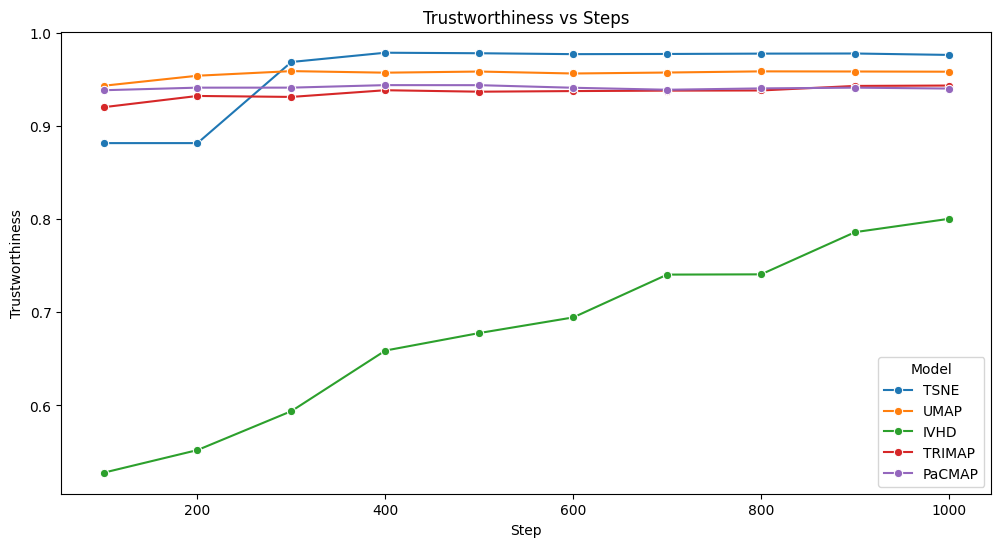

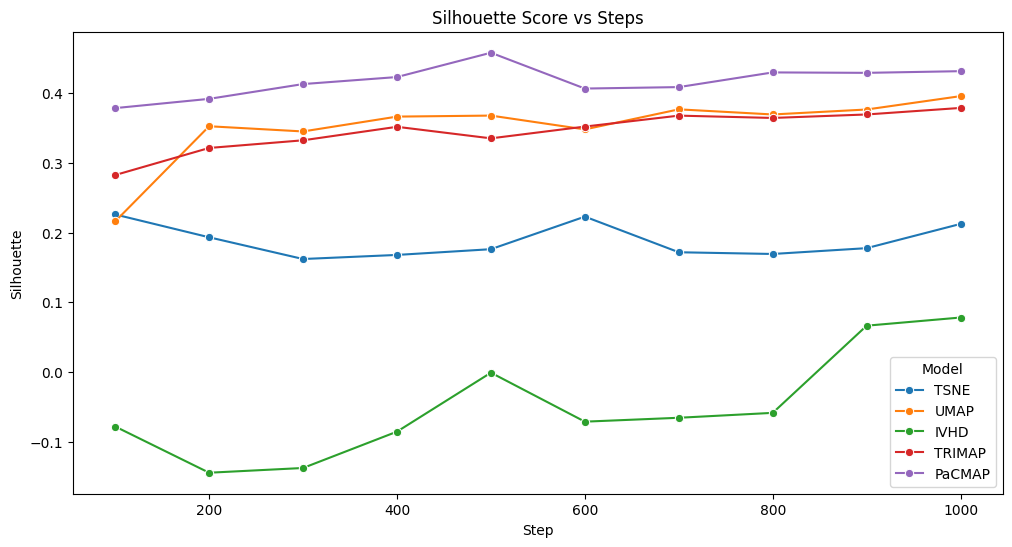

In [8]:
plot_convergence(X, Y, 100, 1001, 100)

Runnig model TSNE
Runnig model UMAP


/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Runnig model IVHD
Searching...
Finished.


0:00:36.614094


0 loss: 0.3490501344203949
100 loss: 0.03190439194440842
200 loss: 0.027126431465148926
300 loss: 0.023523228242993355
400 loss: 0.020172785967588425
500 loss: 0.0172819085419178
600 loss: 0.015105384401977062
700 loss: 0.013597141951322556
800 loss: 0.012592939659953117
900 loss: 0.011930873617529869
1000 loss: 0.011472418904304504
1100 loss: 0.011142377741634846
1200 loss: 0.010892974212765694
1300 loss: 0.010702861472964287
1400 loss: 0.010555443353950977
1500 loss: 0.010440102778375149
1600 loss: 0.010352306067943573
1700 loss: 0.010286272503435612
1800 loss: 0.010235916823148727
1900 loss: 0.010197228752076626
2000 loss: 0.010166876018047333
2100 loss: 0.01014280691742897
2200 loss: 0.010123753920197487
2300 loss: 0.010108462534844875
2400 loss: 0.010095472447574139
2500 loss: 0.01008459273725748
2600 loss: 0.010075581260025501
2700 loss: 0.010067812167108059
2800 loss: 0.010060939937829971
2900 loss: 0.010054577142000198
Runnig model Trimap
Runnig model Pacmap
Runnig model TSNE
E

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Runnig model IVHD
Searching...
Finished.


0:00:36.787446


0 loss: 0.6705604791641235
100 loss: 0.029827242717146873
200 loss: 0.024417167529463768
300 loss: 0.020292753353714943
400 loss: 0.016809556633234024
500 loss: 0.014110867865383625
600 loss: 0.012177870608866215
700 loss: 0.010835559107363224
800 loss: 0.009903416968882084
900 loss: 0.009245001710951328
1000 loss: 0.008768326602876186
1100 loss: 0.00841362215578556
1200 loss: 0.008142247796058655
1300 loss: 0.007928243838250637
1400 loss: 0.00775470957159996
1500 loss: 0.00761098088696599
1600 loss: 0.007490162737667561
1700 loss: 0.007387480232864618
1800 loss: 0.007299508899450302
1900 loss: 0.007223738823086023
2000 loss: 0.007158237509429455
2100 loss: 0.007101401221007109
2200 loss: 0.007051653228700161
2300 loss: 0.007007692940533161
2400 loss: 0.0069685447961091995
2500 loss: 0.00693350937217474
2600 loss: 0.006902086548507214
2700 loss: 0.0068738944828510284
2800 loss: 0.006848620250821114
2900 loss: 0.0068259816616773605
Runnig model Trimap
Runnig model Pacmap
Runnig model TS

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Runnig model IVHD
Searching...
Finished.


0:00:36.804181


0 loss: 1.0058435201644897
100 loss: 0.029111851006746292
200 loss: 0.02330981008708477
300 loss: 0.018485061824321747
400 loss: 0.014477595686912537
500 loss: 0.011648960411548615
600 loss: 0.009851559065282345
700 loss: 0.008742105215787888
800 loss: 0.008042673580348492
900 loss: 0.007579296827316284
1000 loss: 0.0072526708245277405
1100 loss: 0.007008564658463001
1200 loss: 0.006818095687776804
1300 loss: 0.006665865890681744
1400 loss: 0.006543013267219067
1500 loss: 0.006443536840379238
1600 loss: 0.0063627539202570915
1700 loss: 0.006296838633716106
1800 loss: 0.006242707371711731
1900 loss: 0.006197940092533827
2000 loss: 0.006160669960081577
2100 loss: 0.006129461340606213
2200 loss: 0.006103198509663343
2300 loss: 0.006081004627048969
2400 loss: 0.006062174681574106
2500 loss: 0.006046137306839228
2600 loss: 0.006032424978911877
2700 loss: 0.006020647939294577
2800 loss: 0.006010488606989384
2900 loss: 0.00600168202072382
Runnig model Trimap
Runnig model Pacmap
Runnig model T

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Runnig model IVHD
Searching...
Finished.


0:00:37.045781


0 loss: 1.337359070777893
100 loss: 0.028649289160966873
200 loss: 0.022913333028554916
300 loss: 0.018079282715916634
400 loss: 0.01396018173545599
500 loss: 0.010985609143972397
600 loss: 0.009088071063160896
700 loss: 0.007941114716231823
800 loss: 0.007251610979437828
900 loss: 0.0068276552483439445
1000 loss: 0.00655732536688447
1100 loss: 0.006377573125064373
1200 loss: 0.006252705585211515
1300 loss: 0.006162092089653015
1400 loss: 0.006093515548855066
1500 loss: 0.006039578467607498
1600 loss: 0.0059957015328109264
1700 loss: 0.005958988331258297
1800 loss: 0.005927565041929483
1900 loss: 0.005900188349187374
2000 loss: 0.005876012146472931
2100 loss: 0.005854448769241571
2200 loss: 0.005835074931383133
2300 loss: 0.00581758189946413
2400 loss: 0.005801738239824772
2500 loss: 0.005787360481917858
2600 loss: 0.00577430659905076
2700 loss: 0.005762455053627491
2800 loss: 0.005751702003180981
2900 loss: 0.005741959437727928
Runnig model Trimap
Runnig model Pacmap


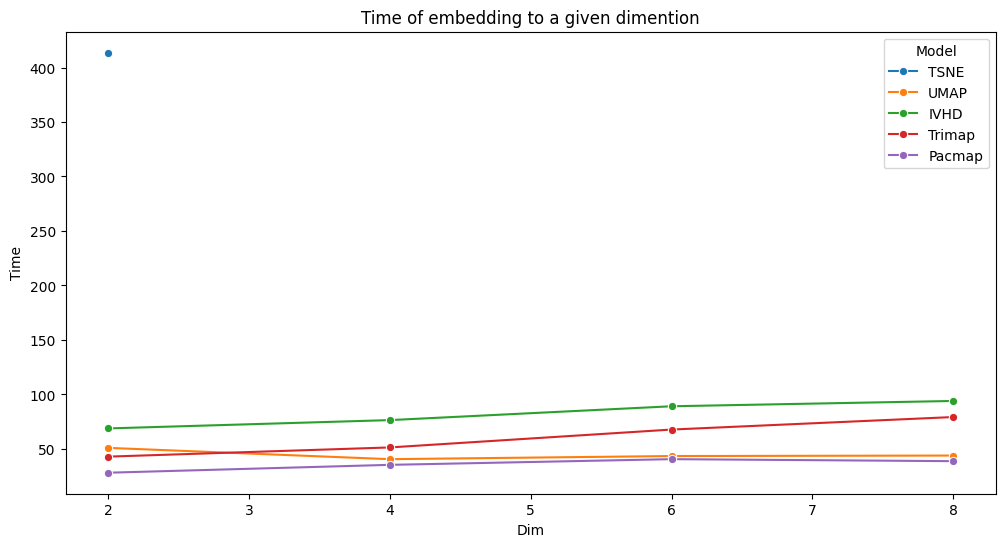

In [5]:
plot_for_embed_dim('cpu')

Runnig model TSNE
[W] [23:01:33.931016] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


Runnig model UMAP
Runnig model IVHD
Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.338780


0 loss: 0.34982797503471375
100 loss: 0.031942903995513916
200 loss: 0.02729140780866146
300 loss: 0.0237172469496727
400 loss: 0.02045086771249771
500 loss: 0.01775466278195381
600 loss: 0.015731703490018845
700 loss: 0.014277059584856033
800 loss: 0.013270801864564419
900 loss: 0.012591259554028511
1000 loss: 0.012123427353799343
1100 loss: 0.011777260340750217
1200 loss: 0.011504720896482468
1300 loss: 0.011280554346740246
1400 loss: 0.011100693605840206
1500 loss: 0.010953418910503387
1600 loss: 0.010830028913915157
1700 loss: 0.010727819986641407
1800 loss: 0.010643702931702137
1900 loss: 0.010577168315649033
2000 loss: 0.010525034740567207
2100 loss: 0.010481586679816246
2200 loss: 0.010445068590342999
2300 loss: 0.01041431911289692
2400 loss: 0.010387019254267216
2500 loss: 0.0103621706366539
2600 loss: 0.01033921167254448
2700 loss: 0.010317228734493256
2800 loss: 0.010295970365405083
2900 loss: 0.010275311768054962
Runnig model TSNE
Error with TSNE message: Currently TSNE supp

0:00:00.339877


0 loss: 0.6723935604095459
100 loss: 0.029765818268060684
200 loss: 0.024075668305158615
300 loss: 0.01942566968500614
400 loss: 0.015369178727269173
500 loss: 0.012307655066251755
600 loss: 0.010279737412929535
700 loss: 0.009025475941598415
800 loss: 0.008263234980404377
900 loss: 0.007794087287038565
1000 loss: 0.007495461031794548
1100 loss: 0.007297653704881668
1200 loss: 0.007161326706409454
1300 loss: 0.007063716650009155
1400 loss: 0.00699112843722105
1500 loss: 0.006935082376003265
1600 loss: 0.006890257820487022
1700 loss: 0.006853275932371616
1800 loss: 0.006821993738412857
1900 loss: 0.006795055698603392
2000 loss: 0.006771585904061794
2100 loss: 0.006750978995114565
2200 loss: 0.0067327916622161865
2300 loss: 0.006716682109981775
2400 loss: 0.0067023783922195435
2500 loss: 0.006689650472253561
2600 loss: 0.006678303703665733
2700 loss: 0.00666816346347332
2800 loss: 0.0066590746864676476
2900 loss: 0.006650897208601236
Runnig model TSNE
Error with TSNE message: Currently T

0:00:00.340110


0 loss: 1.0059282779693604
100 loss: 0.029104597866535187
200 loss: 0.02340621128678322
300 loss: 0.018682921305298805
400 loss: 0.014774998649954796
500 loss: 0.011995691806077957
600 loss: 0.010187085717916489
700 loss: 0.0090260561555624
800 loss: 0.008263161405920982
900 loss: 0.00774574326351285
1000 loss: 0.007382011041045189
1100 loss: 0.007116288878023624
1200 loss: 0.006915210746228695
1300 loss: 0.006758698727935553
1400 loss: 0.006634348537772894
1500 loss: 0.006534140091389418
1600 loss: 0.006452593952417374
1700 loss: 0.006385748274624348
1800 loss: 0.006330597214400768
1900 loss: 0.006284790113568306
2000 loss: 0.0062464503571391106
2100 loss: 0.0062140729278326035
2200 loss: 0.006186452228575945
2300 loss: 0.0061626192182302475
2400 loss: 0.006141806952655315
2500 loss: 0.006123408675193787
2600 loss: 0.006106947548687458
2700 loss: 0.006092051975429058
2800 loss: 0.006078431848436594
2900 loss: 0.006065861321985722
Runnig model TSNE
Error with TSNE message: Currently TS

0:00:00.345929


0 loss: 1.3407124280929565
100 loss: 0.02866719476878643
200 loss: 0.022876691073179245
300 loss: 0.017910655587911606
400 loss: 0.013744593597948551
500 loss: 0.010833293199539185
600 loss: 0.009019296616315842
700 loss: 0.007933320477604866
800 loss: 0.0072811380960047245
900 loss: 0.00687958300113678
1000 loss: 0.006623348221182823
1100 loss: 0.006453059148043394
1200 loss: 0.006334956735372543
1300 loss: 0.0062494464218616486
1400 loss: 0.006184874102473259
1500 loss: 0.006134144030511379
1600 loss: 0.0060928319580852985
1700 loss: 0.006058128550648689
1800 loss: 0.006028209812939167
1900 loss: 0.006001872010529041
2000 loss: 0.005978304892778397
2100 loss: 0.00595694687217474
2200 loss: 0.005937404930591583
2300 loss: 0.005919391755014658
2400 loss: 0.005902695469558239
2500 loss: 0.0058871544897556305
2600 loss: 0.005872639827430248
2700 loss: 0.0058590504340827465
2800 loss: 0.005846301093697548
2900 loss: 0.005834323354065418


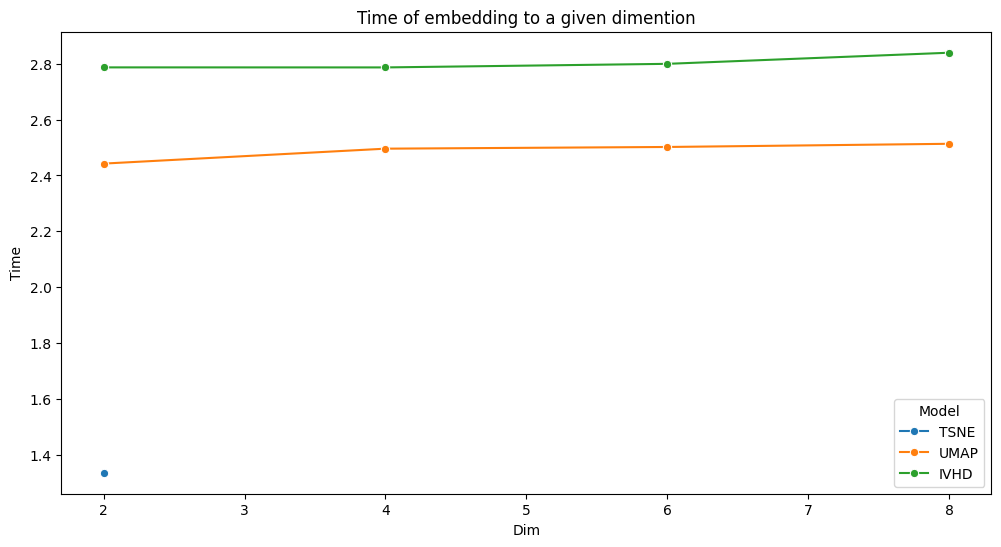

In [8]:
plot_for_embed_dim('cuda')

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


[W] [23:17:30.406080] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[I] [23:17:31.742658] Building knn graph using nn descent
Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.339064


0 loss: 0.35026293992996216
100 loss: 0.03177638351917267
200 loss: 0.02688387781381607
300 loss: 0.023115474730730057
400 loss: 0.019800007343292236
500 loss: 0.01708412915468216
600 loss: 0.015077224001288414
700 loss: 0.013677072711288929
800 loss: 0.012745849788188934
900 loss: 0.012126050889492035
1000 loss: 0.011684967204928398
1100 loss: 0.01136336661875248
1200 loss: 0.011130218394100666
1300 loss: 0.010962080210447311
1400 loss: 0.01083490252494812
1500 loss: 0.01073334738612175
1600 loss: 0.010651678778231144
1700 loss: 0.010585746727883816
1800 loss: 0.010528316721320152
1900 loss: 0.010475888848304749
2000 loss: 0.010424334555864334
2100 loss: 0.010374356061220169
2200 loss: 0.010326823219656944
2300 loss: 0.010281670838594437
2400 loss: 0.010240507312119007
2500 loss: 0.010202835313975811
2600 loss: 0.010168541222810745
2700 loss: 0.01013709232211113
2800 loss: 0.010108401998877525
2900 loss: 0.010080857202410698


/tmp/ipykernel_3632834/3701833852.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y="Time", palette="pastel")


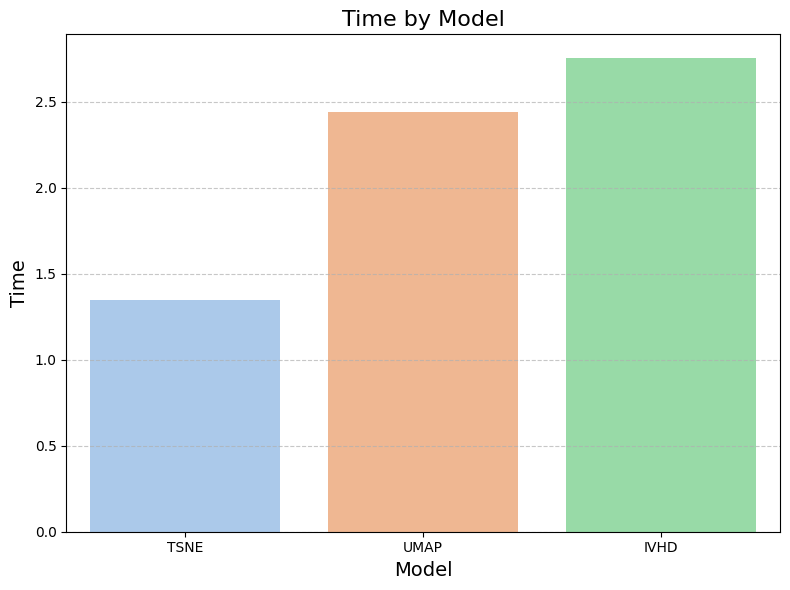

In [18]:
speed_test_net('cuda', 'mnist')

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Searching...
Finished.


0:00:36.518509


0 loss: 0.3481394648551941
100 loss: 0.03182876482605934
200 loss: 0.02685570903122425
300 loss: 0.022769585251808167
400 loss: 0.01916482299566269
500 loss: 0.01636897400021553
600 loss: 0.014480914920568466
700 loss: 0.013322114944458008
800 loss: 0.012604022398591042
900 loss: 0.012130813673138618
1000 loss: 0.011799704283475876
1100 loss: 0.011555182747542858
1200 loss: 0.011370828375220299
1300 loss: 0.011229523457586765
1400 loss: 0.011116237379610538
1500 loss: 0.011023497208952904
1600 loss: 0.010945956222712994
1700 loss: 0.010879232548177242
1800 loss: 0.010819629766047001
1900 loss: 0.010765529237687588
2000 loss: 0.010716675780713558
2100 loss: 0.010671747848391533
2200 loss: 0.010630100965499878
2300 loss: 0.010591545142233372
2400 loss: 0.010555749759078026
2500 loss: 0.010522277094423771
2600 loss: 0.010490374639630318
2700 loss: 0.010458813980221748
2800 loss: 0.010427486151456833
2900 loss: 0.010396263562142849


/tmp/ipykernel_3632834/3701833852.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y="Time", palette="pastel")


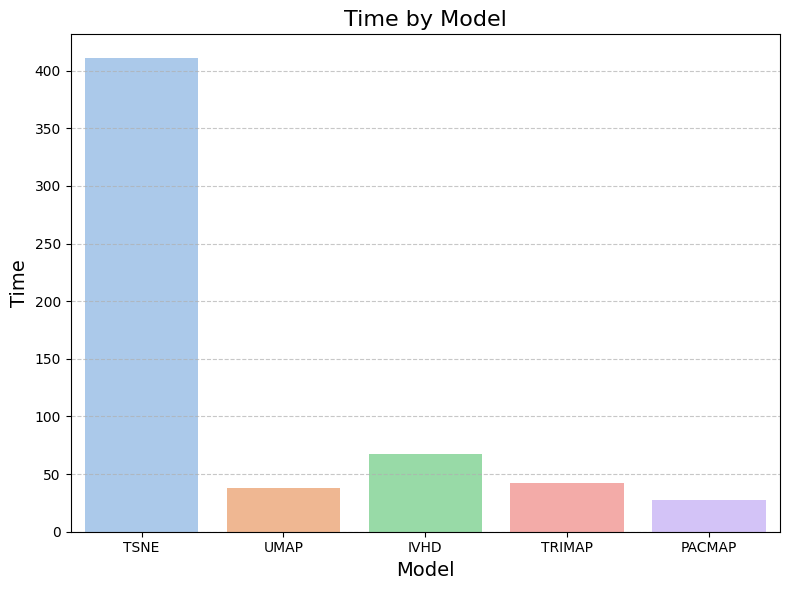

In [20]:
speed_test_net('cpu', 'mnist')

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


[W] [10:51:24.881145] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[I] [10:51:28.091567] Building knn graph using nn descent
Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.933664


0 loss: 0.3474372327327728
100 loss: 0.03251197189092636
200 loss: 0.028017930686473846
300 loss: 0.02453899197280407
400 loss: 0.021581469103693962
500 loss: 0.019248291850090027
600 loss: 0.017558971419930458
700 loss: 0.016385342925786972
800 loss: 0.015558955259621143
900 loss: 0.014967063441872597
1000 loss: 0.014537756331264973
1100 loss: 0.0142191331833601
1200 loss: 0.013975809328258038
1300 loss: 0.01378246396780014
1400 loss: 0.01362784393131733
1500 loss: 0.013503506779670715
1600 loss: 0.013402853161096573
1700 loss: 0.013321273028850555
1800 loss: 0.013254514895379543
1900 loss: 0.01319920551031828
2000 loss: 0.013153109699487686
2100 loss: 0.013113743625581264
2200 loss: 0.01307954452931881
2300 loss: 0.013048920780420303
2400 loss: 0.013021535240113735
2500 loss: 0.01299688033759594
2600 loss: 0.012974098324775696
2700 loss: 0.012953211553394794
2800 loss: 0.012933772057294846
2900 loss: 0.012915078550577164


/tmp/ipykernel_3789459/1591748400.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y="Time", palette="pastel")


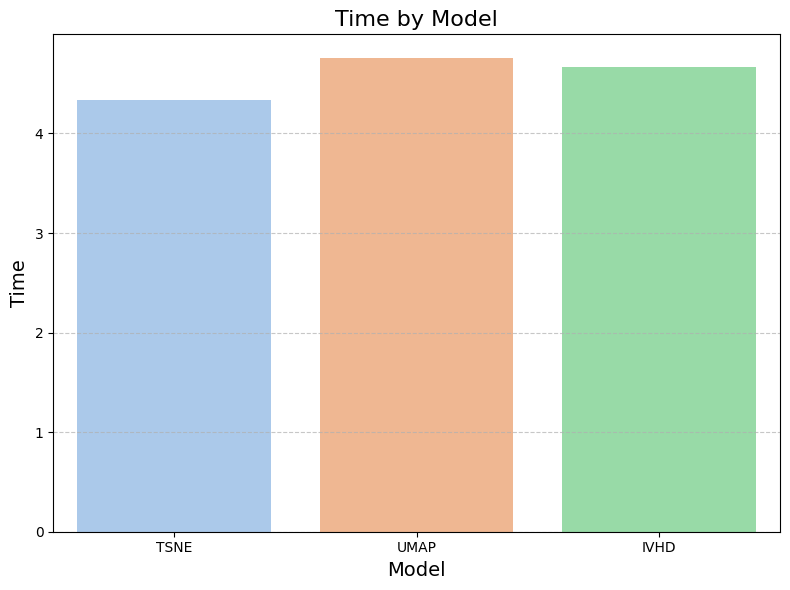

In [3]:
speed_test_net('cuda', 'emnist')

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


[W] [10:52:13.809492] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[I] [10:52:40.948974] Building knn graph using nn descent
Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:01.034218


0 loss: 0.3475797474384308
100 loss: 0.036561377346515656
200 loss: 0.034717705100774765
300 loss: 0.029450517147779465
400 loss: 0.018077148124575615
500 loss: 0.012437092140316963
600 loss: 0.010369203053414822
700 loss: 0.009577266871929169
800 loss: 0.009255963377654552
900 loss: 0.009111033752560616
1000 loss: 0.009037203155457973
1100 loss: 0.008994975127279758
1200 loss: 0.00896839052438736
1300 loss: 0.008950241841375828
1400 loss: 0.008936954662203789
1500 loss: 0.008926643058657646
1600 loss: 0.00891824346035719
1700 loss: 0.008911194279789925
1800 loss: 0.008905095048248768
1900 loss: 0.008899685926735401
2000 loss: 0.008894812315702438
2100 loss: 0.008890367113053799
2200 loss: 0.008886288851499557
2300 loss: 0.00888253003358841
2400 loss: 0.008879060856997967
2500 loss: 0.008875859901309013
2600 loss: 0.008872922509908676
2700 loss: 0.008870192803442478
2800 loss: 0.008867654018104076
2900 loss: 0.008865289390087128


/tmp/ipykernel_3789459/1591748400.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y="Time", palette="pastel")


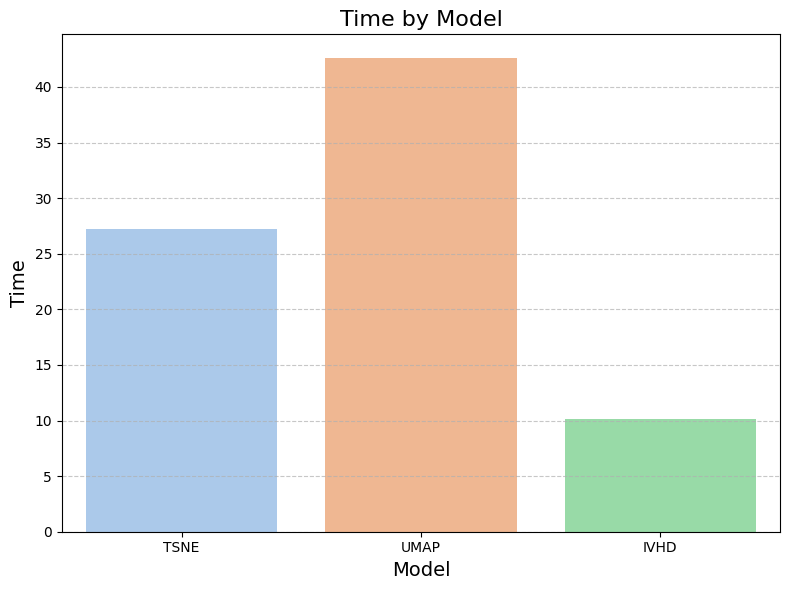

In [4]:
speed_test_net("cuda", "synthetic")

In [2]:
from time import time
from ivhd import IVHD
from sklearn.datasets import make_blobs

def speed_models_for_samples(device, n_start, n_stop, n_step):
    result_list = []
    steps = range(n_start, n_stop, n_step)
    print(list(steps))
    for step in steps:
        if device == 'cuda':
            from cuml import TSNE, UMAP
            models = {
                'TSNE': TSNE(),
                'UMAP': UMAP(),
                'IVHD': IVHD(
                    2,
                    nn=2,
                    rn=1,
                    c=0.05,
                    eta=0.02,
                    optimizer=None,
                    optimizer_kwargs={"lr": 0.1},
                    epochs=3_000,
                    device="cuda",
                    velocity_limit=False,
                    autoadapt=False,
                    graph_file="./graph_files/graph.bin",
                ),
            }
        else:
            from models.tsne import MY_TSNE
            from umap import UMAP
            from trimap import TRIMAP
            from pacmap import PaCMAP
            models = {
                'TSNE': MY_TSNE(),
                'UMAP': UMAP(),
                'IVHD': IVHD(
                    2,
                    nn=2,
                    rn=1,
                    c=0.05,
                    eta=0.02,
                    optimizer=None,
                    optimizer_kwargs={"lr": 0.1},
                    epochs=3_000,
                    device="cpu",
                    velocity_limit=False,
                    autoadapt=False,
                    graph_file="./graph_files/graph.bin",
                ),
                'TRIMAP': TRIMAP(),
                'PACMAP': PaCMAP()
            }
        X, _ = make_blobs(n_samples=step, centers=10, n_features=20)
        for model_name, model_dr in models.items():
            print(f"Runnig {model_name} with {str(step)}")
            if model_name == "IVHD":
                start = time()
                _ = model_dr.fit_transform(torch.Tensor(X))
                stop = time()
            else:
                start = time()
                _ = model_dr.fit_transform(X)
                stop = time()
                
            result_list.append({
                "Model": model_name,
                "Time": stop - start,
                "n_samples": step
            })
    results = pd.DataFrame(result_list)

    plt.figure(figsize=(8, 6))
    sns.lineplot(data=results, x="n_samples", y="Time", hue="Model")

    # Customize the plot
    plt.title("Time by Model", fontsize=16)
    plt.xlabel("Model", fontsize=14)
    plt.ylabel("Time", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("dataset_time.png")

[50000, 150000, 250000, 350000, 450000, 550000, 650000, 750000, 850000, 950000, 1050000]


/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


Runnig TSNE with 50000
[W] [11:15:41.524921] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
Runnig UMAP with 50000
[I] [11:15:42.621101] Building knn graph using brute force
Runnig IVHD with 50000
Faiss found 1 GPU(s). We only need one :D
Searching...
Finished.


0:00:00.012647


0 loss: 0.3508305549621582
100 loss: 0.03579692170023918
200 loss: 0.028759246692061424
300 loss: 0.017273856326937675
400 loss: 0.012017891742289066
500 loss: 0.010189111344516277
600 loss: 0.009508291259407997
700 loss: 0.009237891063094139
800 loss: 0.009118705987930298
900 loss: 0.009059097617864609
1000 loss: 0.009026098065078259
1100 loss: 0.00900559313595295
1200 loss: 0.00899150688201189
1300 loss: 0.00898123811930418
1400 loss: 0.008973323740065098
1500 loss: 0.008966928347945213
1600 loss: 0.008961457759141922
1700 loss: 0.008956746198236942
1800 loss: 0.00895261112600565
1900 loss: 0.008948775939643383
2000 loss: 0.008945107460021973
2100 loss: 0.008941620588302612
2200 loss: 0.008938217535614967
2300 loss: 0.008934972807765007
2400 loss: 0.00893180537968874
2500 loss: 0.008928709663450718
2600 loss: 0.008925769478082657
2700 loss: 0.008922958746552467
2800 loss: 0.008920232765376568
2900 loss: 0.008917643688619137
Runnig TSNE with 150000
[W] [11:15:44.994623] # of Nearest N

0:00:00.043172


0 loss: 0.3476978838443756
100 loss: 0.03615981340408325
200 loss: 0.03153277933597565
300 loss: 0.020100172609090805
400 loss: 0.012902207672595978
500 loss: 0.010362647473812103
600 loss: 0.009489762596786022
700 loss: 0.009167966432869434
800 loss: 0.009032895788550377
900 loss: 0.008966260589659214
1000 loss: 0.00892809871584177
1100 loss: 0.008903845213353634
1200 loss: 0.00888700783252716
1300 loss: 0.00887455977499485
1400 loss: 0.0088649932295084
1500 loss: 0.008857478387653828
1600 loss: 0.008851449005305767
1700 loss: 0.00884639285504818
1800 loss: 0.008842039853334427
1900 loss: 0.008838243782520294
2000 loss: 0.008834822103381157
2100 loss: 0.00883170310407877
2200 loss: 0.008828936144709587
2300 loss: 0.00882639829069376
2400 loss: 0.00882403552532196
2500 loss: 0.008821857161819935
2600 loss: 0.00881979800760746
2700 loss: 0.008817864581942558
2800 loss: 0.008816046640276909
2900 loss: 0.008814360946416855
Runnig TSNE with 250000
[W] [11:15:57.738832] # of Nearest Neighbo

0:00:00.094457


0 loss: 0.347493976354599
100 loss: 0.03638400509953499
200 loss: 0.03355122357606888
300 loss: 0.02494131214916706
400 loss: 0.015231195837259293
500 loss: 0.011277369223535061
600 loss: 0.00994933769106865
700 loss: 0.0094825504347682
800 loss: 0.009300912730395794
900 loss: 0.009218721650540829
1000 loss: 0.009174210950732231
1100 loss: 0.009145522490143776
1200 loss: 0.009124196134507656
1300 loss: 0.009106704965233803
1400 loss: 0.00909111276268959
1500 loss: 0.009076462127268314
1600 loss: 0.009062386117875576
1700 loss: 0.009048549458384514
1800 loss: 0.009034798480570316
1900 loss: 0.009021102450788021
2000 loss: 0.009007468819618225
2100 loss: 0.008993997238576412
2200 loss: 0.008980827406048775
2300 loss: 0.008968150243163109
2400 loss: 0.008956150151789188
2500 loss: 0.008945038542151451
2600 loss: 0.008934905752539635
2700 loss: 0.008925830014050007
2800 loss: 0.0089177954941988
2900 loss: 0.008910763077437878
Runnig TSNE with 350000
[W] [11:16:15.317410] # of Nearest Neigh

0:00:00.190722


0 loss: 0.3476293087005615
100 loss: 0.03645414113998413
200 loss: 0.034063197672367096
300 loss: 0.02586626634001732
400 loss: 0.01521097682416439
500 loss: 0.01111775916069746
600 loss: 0.009790252894163132
700 loss: 0.009333941154181957
800 loss: 0.009157777763903141
900 loss: 0.009078431874513626
1000 loss: 0.009036552160978317
1100 loss: 0.009011524729430676
1200 loss: 0.00899524800479412
1300 loss: 0.008983883075416088
1400 loss: 0.008975623175501823
1500 loss: 0.008969350717961788
1600 loss: 0.008964456617832184
1700 loss: 0.008960469625890255
1800 loss: 0.008957114070653915
1900 loss: 0.008954181335866451
2000 loss: 0.008951524272561073
2100 loss: 0.008949014358222485
2200 loss: 0.0089466143399477
2300 loss: 0.008944284170866013
2400 loss: 0.008942016400396824
2500 loss: 0.008939767256379128
2600 loss: 0.008937551639974117
2700 loss: 0.00893531646579504
2800 loss: 0.008933112025260925
2900 loss: 0.0089309336617589
Runnig TSNE with 450000
[W] [11:16:41.677500] # of Nearest Neigh

0:00:00.300358


0 loss: 0.34683704376220703
100 loss: 0.03647936135530472
200 loss: 0.034092266112565994
300 loss: 0.025724388659000397
400 loss: 0.015197278000414371
500 loss: 0.011190533638000488
600 loss: 0.009874911978840828
700 loss: 0.009428290650248528
800 loss: 0.00925983302295208
900 loss: 0.0091827642172575
1000 loss: 0.009137490764260292
1100 loss: 0.00910487212240696
1200 loss: 0.009078635834157467
1300 loss: 0.009056679904460907
1400 loss: 0.009038136340677738
1500 loss: 0.009022538550198078
1600 loss: 0.00900948140770197
1700 loss: 0.008998598903417587
1800 loss: 0.008989487774670124
1900 loss: 0.008981884457170963
2000 loss: 0.008975488133728504
2100 loss: 0.008970048278570175
2200 loss: 0.008965402841567993
2300 loss: 0.008961421437561512
2400 loss: 0.008957972750067711
2500 loss: 0.00895494595170021
2600 loss: 0.008952267467975616
2700 loss: 0.008949875831604004
2800 loss: 0.008947723545134068
2900 loss: 0.008945772424340248
Runnig TSNE with 550000
[W] [11:17:17.562320] # of Nearest N

0:00:00.412996


0 loss: 0.34778618812561035
100 loss: 0.03644351661205292
200 loss: 0.03358720988035202
300 loss: 0.024956364184617996
400 loss: 0.015481548383831978
500 loss: 0.011398053728044033
600 loss: 0.00994496513158083
700 loss: 0.009400944225490093
800 loss: 0.00917419046163559
900 loss: 0.009066821075975895
1000 loss: 0.009009374305605888
1100 loss: 0.008975444361567497
1200 loss: 0.008953924290835857
1300 loss: 0.008939617313444614
1400 loss: 0.00892969686537981
1500 loss: 0.008922611363232136
1600 loss: 0.00891739223152399
1700 loss: 0.008913443423807621
1800 loss: 0.00891035608947277
1900 loss: 0.008907896466553211
2000 loss: 0.008905904367566109
2100 loss: 0.008904254995286465
2200 loss: 0.008902865462005138
2300 loss: 0.008901708759367466
2400 loss: 0.00890071876347065
2500 loss: 0.008899843320250511
2600 loss: 0.008899071253836155
2700 loss: 0.00889839231967926
2800 loss: 0.008897775784134865
2900 loss: 0.008897224441170692
Runnig TSNE with 650000
[W] [11:17:57.874056] # of Nearest Nei

0:00:00.533986


0 loss: 0.34817779064178467
100 loss: 0.036508891731500626
200 loss: 0.03390353545546532
300 loss: 0.025498824194073677
400 loss: 0.01573208160698414
500 loss: 0.01161207165569067
600 loss: 0.010145106352865696
700 loss: 0.009586471132934093
800 loss: 0.009346874430775642
900 loss: 0.009228049777448177
1000 loss: 0.009160326793789864
1100 loss: 0.00911676324903965
1200 loss: 0.009085848927497864
1300 loss: 0.009062238968908787
1400 loss: 0.00904312264174223
1500 loss: 0.009026879444718361
1600 loss: 0.009012558497488499
1700 loss: 0.008999508805572987
1800 loss: 0.008987421169877052
1900 loss: 0.008976064622402191
2000 loss: 0.008965428918600082
2100 loss: 0.008955508470535278
2200 loss: 0.008946342393755913
2300 loss: 0.008938000537455082
2400 loss: 0.00893054623156786
2500 loss: 0.008924009278416634
2600 loss: 0.008918387815356255
2700 loss: 0.008913584053516388
2800 loss: 0.008909503929316998
2900 loss: 0.0089061064645648
Runnig TSNE with 750000
[W] [11:18:49.552772] # of Nearest Ne

0:00:00.662350


0 loss: 0.3472976088523865
100 loss: 0.03653080016374588
200 loss: 0.034370701760053635
300 loss: 0.02721255272626877
400 loss: 0.016392948105931282
500 loss: 0.011799074709415436
600 loss: 0.010202241130173206
700 loss: 0.009608618915081024
800 loss: 0.009359306655824184
900 loss: 0.00923529826104641
1000 loss: 0.009162094444036484
1100 loss: 0.00911266915500164
1200 loss: 0.009076324291527271
1300 loss: 0.009048187173902988
1400 loss: 0.009025714360177517
1500 loss: 0.00900739524513483
1600 loss: 0.008992266841232777
1700 loss: 0.008979651145637035
1800 loss: 0.008969062939286232
1900 loss: 0.008960135281085968
2000 loss: 0.00895259901881218
2100 loss: 0.008946219459176064
2200 loss: 0.00894078053534031
2300 loss: 0.008936147205531597
2400 loss: 0.00893216859549284
2500 loss: 0.008928721770644188
2600 loss: 0.008925768546760082
2700 loss: 0.008923246525228024
2800 loss: 0.008921057917177677
2900 loss: 0.008919160813093185
Runnig TSNE with 850000
[W] [11:19:47.238375] # of Nearest Nei

0:00:00.797336


0 loss: 0.34755563735961914
100 loss: 0.03655390068888664
200 loss: 0.03462505713105202
300 loss: 0.029096700251102448
400 loss: 0.01782028004527092
500 loss: 0.012063277885317802
600 loss: 0.010169504210352898
700 loss: 0.009544244967401028
800 loss: 0.009322859346866608
900 loss: 0.009233967401087284
1000 loss: 0.009191012009978294
1100 loss: 0.009165417402982712
1200 loss: 0.009147152304649353
1300 loss: 0.00913229864090681
1400 loss: 0.009119166992604733
1500 loss: 0.009107096120715141
1600 loss: 0.00909571535885334
1700 loss: 0.009084897115826607
1800 loss: 0.009074585512280464
1900 loss: 0.009064819663763046
2000 loss: 0.00905559305101633
2100 loss: 0.009046978317201138
2200 loss: 0.009038993157446384
2300 loss: 0.009031588211655617
2400 loss: 0.009024824015796185
2500 loss: 0.009018674492835999
2600 loss: 0.009013088420033455
2700 loss: 0.009008005261421204
2800 loss: 0.009003404527902603
2900 loss: 0.008999213576316833
Runnig TSNE with 950000
[W] [11:20:52.308587] # of Nearest 

0:00:00.947211


0 loss: 0.3480721116065979
100 loss: 0.03654589504003525
200 loss: 0.03440944105386734
300 loss: 0.026979083195328712
400 loss: 0.01603628508746624
500 loss: 0.011508752591907978
600 loss: 0.009975065477192402
700 loss: 0.009428655728697777
800 loss: 0.00920798722654581
900 loss: 0.009102280251681805
1000 loss: 0.009042304940521717
1100 loss: 0.009003867395222187
1200 loss: 0.008977396413683891
1300 loss: 0.008958522230386734
1400 loss: 0.00894490722566843
1500 loss: 0.008935010991990566
1600 loss: 0.0089278444647789
1700 loss: 0.008922594599425793
1800 loss: 0.008918717503547668
1900 loss: 0.008915848098695278
2000 loss: 0.00891367718577385
2100 loss: 0.008912012912333012
2200 loss: 0.008910692296922207
2300 loss: 0.008909638039767742
2400 loss: 0.008908788673579693
2500 loss: 0.008908084593713284
2600 loss: 0.008907504379749298
2700 loss: 0.008907008916139603
2800 loss: 0.008906565606594086
2900 loss: 0.008906162343919277
Runnig TSNE with 1050000
[W] [11:22:06.806888] # of Nearest Ne

0:00:01.094539


0 loss: 0.34771764278411865
100 loss: 0.0365801639854908
200 loss: 0.034717634320259094
300 loss: 0.029122281819581985
400 loss: 0.017806416377425194
500 loss: 0.012458767741918564
600 loss: 0.0104407649487257
700 loss: 0.0096619613468647
800 loss: 0.009328709915280342
900 loss: 0.009165486320853233
1000 loss: 0.0090743163600564
1100 loss: 0.009018171578645706
1200 loss: 0.008981239050626755
1300 loss: 0.008956004865467548
1400 loss: 0.008938339538872242
1500 loss: 0.008925773203372955
1600 loss: 0.008916748687624931
1700 loss: 0.00891017448157072
1800 loss: 0.008905320428311825
1900 loss: 0.008901681751012802
2000 loss: 0.008898921310901642
2100 loss: 0.008896807208657265
2200 loss: 0.008895172737538815
2300 loss: 0.008893868885934353
2400 loss: 0.008892812766134739
2500 loss: 0.008891966193914413
2600 loss: 0.008891279809176922
2700 loss: 0.008890712633728981
2800 loss: 0.008890219032764435
2900 loss: 0.00888978224247694


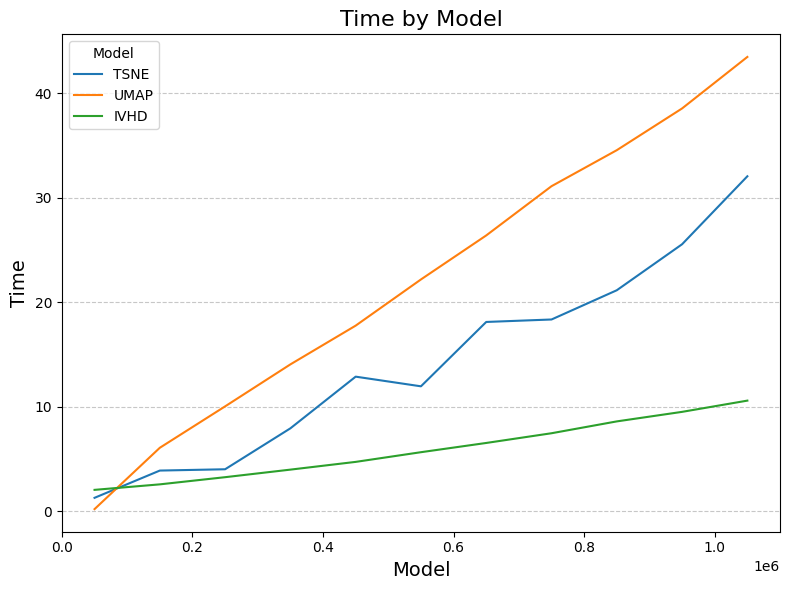

In [3]:
speed_models_for_samples("cuda", 50_000, 1_100_100, 100_000)

[50000, 60000, 70000, 80000, 90000, 100000]
Runnig TSNE with 50000
Runnig UMAP with 50000


/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Runnig IVHD with 50000
Searching...
Finished.


0:00:00.924201


0 loss: 0.34723708033561707
100 loss: 0.035734761506319046
200 loss: 0.028199924156069756
300 loss: 0.016289085149765015
400 loss: 0.011378159746527672
500 loss: 0.009778180159628391
600 loss: 0.009236039593815804
700 loss: 0.009033949114382267
800 loss: 0.008946695365011692
900 loss: 0.008901520632207394
1000 loss: 0.008874673396348953
1100 loss: 0.008856801316142082
1200 loss: 0.008843742311000824
1300 loss: 0.008833873085677624
1400 loss: 0.008826031349599361
1500 loss: 0.00881983619183302
1600 loss: 0.008814835920929909
1700 loss: 0.008810627274215221
1800 loss: 0.008806932717561722
1900 loss: 0.008803687058389187
2000 loss: 0.008800833486020565
2100 loss: 0.008798236958682537
2200 loss: 0.00879595521837473
2300 loss: 0.008793969638645649
2400 loss: 0.008792228996753693
2500 loss: 0.008790727704763412
2600 loss: 0.008789382874965668
2700 loss: 0.008788171224296093
2800 loss: 0.0087870042771101
2900 loss: 0.008786000311374664
Runnig TRIMAP with 50000
Runnig PACMAP with 50000
Runnig 

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Runnig IVHD with 60000
Searching...
Finished.


0:00:01.143392


0 loss: 0.34858763217926025
100 loss: 0.036011457443237305
200 loss: 0.03143635764718056
300 loss: 0.021330732852220535
400 loss: 0.013918310403823853
500 loss: 0.01102110929787159
600 loss: 0.009987184777855873
700 loss: 0.009586990810930729
800 loss: 0.009406214579939842
900 loss: 0.00930895283818245
1000 loss: 0.009247511625289917
1100 loss: 0.009203201159834862
1200 loss: 0.009168493561446667
1300 loss: 0.00913972593843937
1400 loss: 0.009114943444728851
1500 loss: 0.00909318495541811
1600 loss: 0.00907343439757824
1700 loss: 0.00905538909137249
1800 loss: 0.00903871189802885
1900 loss: 0.009023098275065422
2000 loss: 0.009008451364934444
2100 loss: 0.008994785137474537
2200 loss: 0.008981922641396523
2300 loss: 0.008969737216830254
2400 loss: 0.008958373218774796
2500 loss: 0.008947945199906826
2600 loss: 0.008938383311033249
2700 loss: 0.008929692208766937
2800 loss: 0.008921853266656399
2900 loss: 0.008914845064282417
Runnig TRIMAP with 60000
Runnig PACMAP with 60000
Runnig TSNE

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Runnig IVHD with 70000
Searching...
Finished.


0:00:01.580785


0 loss: 0.3481614291667938
100 loss: 0.03578445687890053
200 loss: 0.029101911932229996
300 loss: 0.018223116174340248
400 loss: 0.012514783069491386
500 loss: 0.010418889112770557
600 loss: 0.009595912881195545
700 loss: 0.009244843386113644
800 loss: 0.009081907570362091
900 loss: 0.008997893892228603
1000 loss: 0.00895012728869915
1100 loss: 0.008920781314373016
1200 loss: 0.008901579305529594
1300 loss: 0.008888334035873413
1400 loss: 0.008878788910806179
1500 loss: 0.008871732279658318
1600 loss: 0.008866237476468086
1700 loss: 0.008861775510013103
1800 loss: 0.008858065120875835
1900 loss: 0.008854880928993225
2000 loss: 0.008851991035044193
2100 loss: 0.00884949043393135
2200 loss: 0.00884732324630022
2300 loss: 0.008845367468893528
2400 loss: 0.00884350948035717
2500 loss: 0.008841906674206257
2600 loss: 0.008840449154376984
2700 loss: 0.008839099667966366
2800 loss: 0.008837919682264328
2900 loss: 0.008836866356432438
Runnig TRIMAP with 70000
Runnig PACMAP with 70000
Runnig TS

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Runnig IVHD with 80000
Searching...
Finished.


0:00:01.759082


0 loss: 0.34490081667900085
100 loss: 0.03616690635681152
200 loss: 0.03158950433135033
300 loss: 0.020035691559314728
400 loss: 0.012784061953425407
500 loss: 0.010343446396291256
600 loss: 0.009540141560137272
700 loss: 0.009265432134270668
800 loss: 0.00916279200464487
900 loss: 0.009118638001382351
1000 loss: 0.009096107445657253
1100 loss: 0.009082329459488392
1200 loss: 0.009072728455066681
1300 loss: 0.009065255522727966
1400 loss: 0.009058992378413677
1500 loss: 0.009053502231836319
1600 loss: 0.00904845166951418
1700 loss: 0.009043492376804352
1800 loss: 0.009038404561579227
1900 loss: 0.009032987989485264
2000 loss: 0.009027079679071903
2100 loss: 0.0090206079185009
2200 loss: 0.009013473987579346
2300 loss: 0.00900560338050127
2400 loss: 0.008997106924653053
2500 loss: 0.008988134562969208
2600 loss: 0.008978796191513538
2700 loss: 0.008969360962510109
2800 loss: 0.008959990926086903
2900 loss: 0.008950948715209961
Runnig TRIMAP with 80000
Runnig PACMAP with 80000
Runnig TSN

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Runnig IVHD with 90000
Searching...
Finished.


0:00:02.109939


0 loss: 0.3474530279636383
100 loss: 0.036034658551216125
200 loss: 0.031001124531030655
300 loss: 0.020945513620972633
400 loss: 0.014170962385833263
500 loss: 0.011419402435421944
600 loss: 0.010382535867393017
700 loss: 0.009953996166586876
800 loss: 0.009739461354911327
900 loss: 0.009603045880794525
1000 loss: 0.009497453458607197
1100 loss: 0.009407815523445606
1200 loss: 0.009329713881015778
1300 loss: 0.009261257015168667
1400 loss: 0.009200487285852432
1500 loss: 0.009145979769527912
1600 loss: 0.00909740012139082
1700 loss: 0.009054654277861118
1800 loss: 0.009017761796712875
1900 loss: 0.008987192064523697
2000 loss: 0.008962723426520824
2100 loss: 0.008943557739257812
2200 loss: 0.008928761817514896
2300 loss: 0.008917506784200668
2400 loss: 0.008909043855965137
2500 loss: 0.008902650326490402
2600 loss: 0.008897718973457813
2700 loss: 0.008893965743482113
2800 loss: 0.008891085162758827
2900 loss: 0.00888887420296669
Runnig TRIMAP with 90000
Runnig PACMAP with 90000
Runnig

/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/net/tscratch/people/plgfilipreka/.conda/envs/rapid/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Runnig IVHD with 100000
Searching...
Finished.


0:00:02.379753


0 loss: 0.34785857796669006
100 loss: 0.036045871675014496
200 loss: 0.03149407356977463
300 loss: 0.020031757652759552
400 loss: 0.01277654618024826
500 loss: 0.010281444527208805
600 loss: 0.009453008882701397
700 loss: 0.009156586602330208
800 loss: 0.009035829454660416
900 loss: 0.008977394551038742
1000 loss: 0.008943542838096619
1100 loss: 0.008921072818338871
1200 loss: 0.008904874324798584
1300 loss: 0.008892460726201534
1400 loss: 0.008882693015038967
1500 loss: 0.008874760009348392
1600 loss: 0.008868281729519367
1700 loss: 0.008862835355103016
1800 loss: 0.008858087472617626
1900 loss: 0.008853874169290066
2000 loss: 0.008850202895700932
2100 loss: 0.008846975862979889
2200 loss: 0.008844047784805298
2300 loss: 0.008841310627758503
2400 loss: 0.008838765323162079
2500 loss: 0.008836394175887108
2600 loss: 0.008834206499159336
2700 loss: 0.008832144550979137
2800 loss: 0.008830179460346699
2900 loss: 0.008828292600810528
Runnig TRIMAP with 100000
Runnig PACMAP with 100000


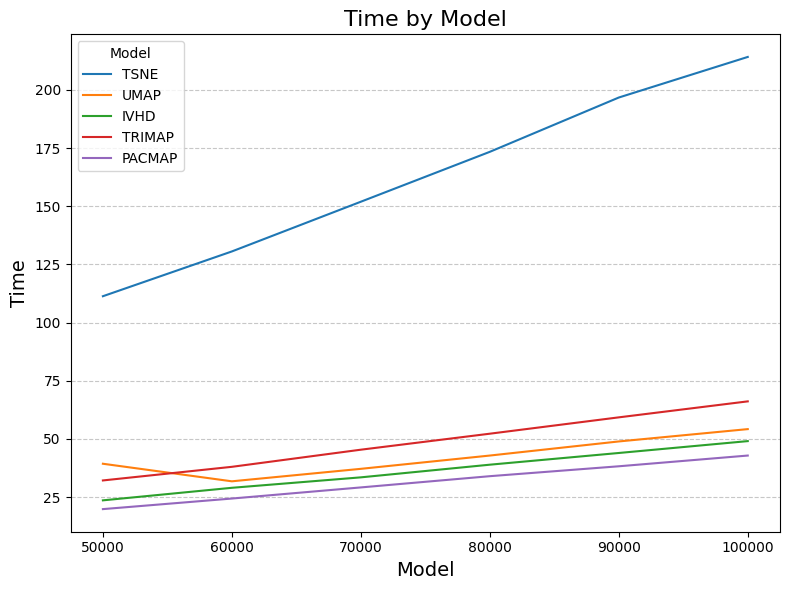

In [4]:
speed_models_for_samples("cpu", 50_000, 100_100, 10_000)